# Digit Recognizer (MNIST dataset) tutorial 

Let's read the data

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## What's MNIST?

+ **"Hello World"** of Machine Learning.
+ Contain images of handwritten digits with integer labels
+ Each image has 28x28 pixels (784 featurs)

Let's explore the data.

In [15]:
%pylab inline

#Display 9 random images from data set
def draw_image(x, y, title_str):
    for c in range(1, 10):
        subplot(3, 3,c)
        i = randint(x.shape[0]) #
        im = x[i].reshape((28,28)) #
        axis("off")
        label = np.argmax(y[i]) # 
        title("{} = {}".format(title_str, label))
        imshow(im)

Populating the interactive namespace from numpy and matplotlib


('Training set: ', (55000, 784))
('Validation set: ', (5000, 784))
('Test set: ', (10000, 784))


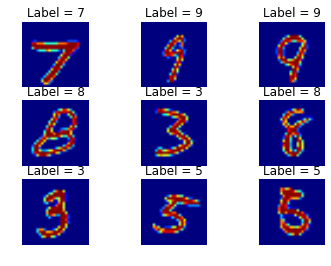

In [16]:
print ("Training set: ", mnist.train.images.shape)
print ("Validation set: ", mnist.validation.images.shape)
print ("Test set: ", mnist.test.images.shape)

random.seed(42)
# Display 9 number randomly selectly
draw_image(mnist.train.images, mnist.train.labels, "Label")


## Build tensorflow graph for simple neural network

In [17]:
import tensorflow as tf 

# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])


def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer


# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

## Launch the graph

('Epoch:', '0001', 'cost=', '226.282963526')
('Epoch:', '0002', 'cost=', '46.989988972')
('Epoch:', '0003', 'cost=', '29.672972733')
('Epoch:', '0004', 'cost=', '20.662996715')
('Epoch:', '0005', 'cost=', '15.154772873')
('Epoch:', '0006', 'cost=', '11.405783046')
('Epoch:', '0007', 'cost=', '8.597238054')
('Epoch:', '0008', 'cost=', '6.301395811')
('Epoch:', '0009', 'cost=', '4.871647258')
('Epoch:', '0010', 'cost=', '3.649679019')
('Epoch:', '0011', 'cost=', '2.860108992')
('Epoch:', '0012', 'cost=', '2.100192550')
('Epoch:', '0013', 'cost=', '1.631030969')
('Epoch:', '0014', 'cost=', '1.231608356')
('Epoch:', '0015', 'cost=', '1.065695425')
Optimization Finished!
('Accuracy:', 0.94510001)


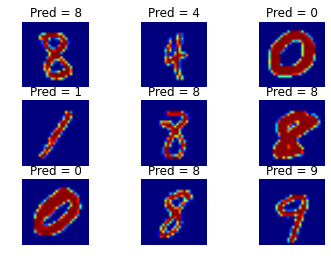

In [18]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    #
    # Calculate accuracy
    prediction = pred.eval({x: mnist.test.images})
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({ y: mnist.test.labels}))
    
    draw_image(mnist.test.images, prediction, "Pred")